# CW7 - Statistical Thermodynamics
## Problem Set 1
### Aadil Aslam

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import pandas as pd
from scipy import random
import math, random
from scipy.integrate import quad
import sympy

# Question 1
## plot U(r) and f(r) 
### Helium

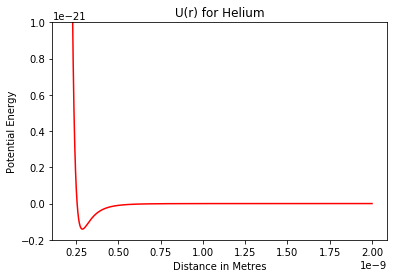

In [2]:
He_sigma = 2.56E-10 # Sigma value in Metres
He_epsilon = 1.41E-22 # Epsilon value in Joules
r = np.linspace(2e-10, 20e-10, 10000) # Plots 10,000 values between 2 and 20 Angstroms

def He_U(r):
    return 4*He_epsilon*((He_sigma/r)**(12)-(He_sigma/r)**(6))

plt.plot(r, He_U(r), 'r')
plt.ylim(-0.2e-21,1e-21) # Sets y limits
plt.title('U(r) for Helium')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()

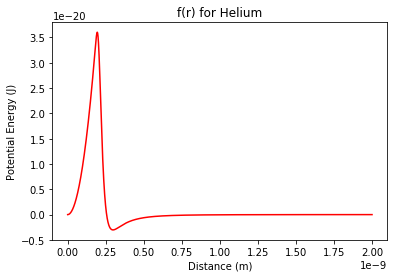

Helium max potential energy: 3.602767175832326e-20 Joules
Helium min potential energy: -3.026494706310864e-21 Joules


In [3]:
k = 1.38E-23 # Boltzmann constant
T = 293.15 # Temperature
r = np.linspace(0.0001e-10, 20e-10, 10000) # Plots 10,000 values between 0.0001 and 20 Angstroms

def He_f(r):
    return (1-(np.exp((-He_U(r)/(k*T)))))*(r**2)
            
plt.plot(r, He_f(r),'r')
plt.title('f(r) for Helium')
plt.xlabel('Distance (m)')
plt.ylabel('Potential Energy (J)')
plt.show()

# Finding the values for the maximum and minimum potential energies.

def poten(r):
    return (1-(np.exp((-He_U(r)/(k*T)))))*(r**2)

r_min = 0.0001e-10
r_max = 20e-10

numSteps = 100000
y_min = poten(r_min)
y_max = y_min
for i in range(numSteps):
    r = r_min + (r_max - r_min) * float(i) / numSteps
    y = poten(r)
    if y < y_min: y_min = y
    if y > y_max: y_max = y
        
print('Helium max potential energy:',y_max,'Joules')
print('Helium min potential energy:',y_min,'Joules')

### Monte Carlo for Helium

In [4]:
# Area between 0 and 2.56 angstroms

def b_He(r):
    return (1-(np.exp((-He_U(r)/(k*T)))))*(r**2)

rmin = 0.0
rmax = He_sigma

ymin = 0.0
ymax = y_max

rectArea = (rmax - rmin) * (ymax - ymin)
numPoints = 1000000 # Plots 1,000,000 points in the range 
ctr = 0
for j in range(numPoints):
    r = rmin + (rmax - rmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if b_He(r) > 0 and y > 0 and y <= b_He(r):
        ctr += 1
    if b_He(r) < 0 and y < 0 and y >= b_He(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea = ((rectArea * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the first part =', fnArea, 'cm\u00b3 mol\u207b\u00b9')

# Area between 2.56 and 20 Angstroms

def b(r):
    return abs((1-(np.exp((-He_U(r)/(k*T)))))*(r**2))

rmin1 = He_sigma
rmax1 = 20e-10

ymin1 = 0.0
ymax1 = -y_min # Absolute value of the minimum potential energy

rectArea1 = (rmax1 - rmin1) * (ymax1 - ymin1)
numPoints = 1000000 # Plots 1,000,000 points in the range
ctr = 0
for i in range(numPoints):
    r = rmin1 + (rmax1 - rmin1) * random.random()
    y = ymin1 + (ymax1 - ymin1) * random.random()
    if b(r) > 0 and y > 0 and y <= b(r):
        ctr += 1
    if b(r) < 0 and y < 0 and y >= b(r):
        ctr += 1
        
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea1 = ((rectArea1 * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6 
print('Area for the second part =', fnArea1, 'cm\u00b3 mol\u207b\u00b9')

He_MC = fnArea-fnArea1
print('Monte Carlo Area =',He_MC, 'cm\u00b3 mol\u207b\u00b9') # Prints Monte Carlo area.
print('Literature value: 11.16 cm\u00b3 mol\u207b\u00b9')

Area for the first part = 13.135947262513557 cm³ mol⁻¹
Area for the second part = 1.973946426192428 cm³ mol⁻¹
Monte Carlo Area = 11.162000836321129 cm³ mol⁻¹
Literature value: 11.16 cm³ mol⁻¹


### Numerical Integration for Helium

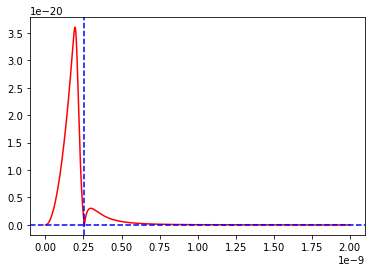

First area: 13.14723518733594 cm³ mol⁻¹
Second area: 1.9763604927472784 cm³ mol⁻¹ 
Actual area: 11.170874694588662 cm³ mol⁻¹
Literature value: 11.16 cm³ mol⁻¹


In [5]:
r = np.linspace(.0001e-10, 20e-10,num=10000)
He_pos = abs(He_f(r))

plt.plot(r, He_pos, 'r') # Plots absolute value of the He_f(r) curve
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.axvline(x = 2.56e-10, color = 'b', linestyle = '--') # The sigma value where the potential is 0

plt.show()

def integrand(r):
    return abs(He_f(r))

ans, err = quad(integrand, 0, 2.56e-10) # Finds the area between 0 and 2.56 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_He1 = ans * (6.02214E23) * (1e6) * (2 * np.pi) 
print('First area:',b2_He1, 'cm\u00b3 mol\u207b\u00b9')

ans, err = quad(integrand, 2.56E-10, 20e-10) # Finds the area between 2.56 and 20 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_He2 = ans * (6.02214E23) * (1e6) * (2 * np.pi) 
print('Second area:',b2_He2, 'cm\u00b3 mol\u207b\u00b9 ')

print('Actual area:',b2_He1-b2_He2, 'cm\u00b3 mol\u207b\u00b9') # The value that is supposed to be below the curve contributes a 'negative' area and so this has to be subtracted.
print('Literature value: 11.16 cm\u00b3 mol\u207b\u00b9')


### Nitrogen

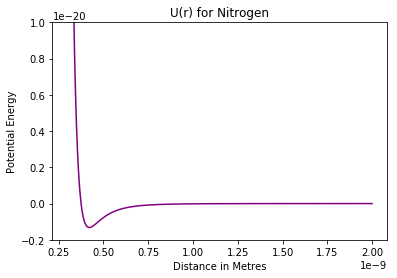

In [6]:
N2_sigma = 3.75e-10 # Sigma value in Metres
N2_epsilon = 1.32E-21 # Epsilon value in Joules
r = np.linspace(3e-10, 20e-10, 10000) # Plots 10,000 values between 3 and 20 

def N2_U(r):
    return 4*N2_epsilon*((N2_sigma/r)**(12)-(N2_sigma/r)**(6))

plt.plot(r, N2_U(r), 'purple')
plt.ylim(-0.2e-20,1e-20)
plt.title('U(r) for Nitrogen')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()

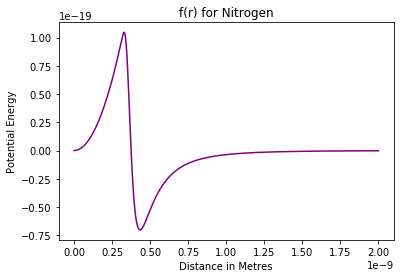

Nitrogen max potential energy: 1.0467928159148345e-19 Joules
Nitrogen min potential energy: -7.028693767748459e-20 Joules


In [7]:
k = 1.38E-23 #Boltzmann constant
T = 293.15 # Temperature
r = np.linspace(0.0001e-10, 20e-10, 10000) # Plots 10,000 values between 0.0001 and 20 Angstroms
n= 100000

def N2_f(r):
    return (1-(np.exp((-N2_U(r)/(k*T)))))*(r**2)
            
plt.plot(r, N2_f(r), 'purple')
plt.title('f(r) for Nitrogen')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')

plt.show()

# Finding the values for the maximum and minimum potential energies.

def poten(r):
    return (1-(np.exp((-N2_U(r)/(k*T)))))*(r**2)

r_min = 0.0001e-10
r_max = 20e-10

numSteps = 100000
y_min = poten(r_min)
y_max = y_min
for i in range(numSteps):
    r = r_min + (r_max - r_min) * float(i) / numSteps
    y = poten(r)
    if y < y_min: y_min = y
    if y > y_max: y_max = y
        
print('Nitrogen max potential energy:',y_max,'Joules')
print('Nitrogen min potential energy:',y_min,'Joules')

### Monte Carlo for Nitrogen

In [8]:
# Area between 0 and 3.75 angstroms

def b_N2(r):
    return (1-(np.exp((-N2_U(r)/(k*T)))))*(r**2)

rmin = 0.0
rmax = N2_sigma

ymin = 0.0
ymax = y_max

rectArea = (rmax - rmin) * (ymax - ymin)
numPoints = 1000000
ctr = 0
for j in range(numPoints):
    r = rmin + (rmax - rmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if b_N2(r) > 0 and y > 0 and y <= b_N2(r):
        ctr += 1
    if b_N2(r) < 0 and y < 0 and y >= b_N2(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea = ((rectArea * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the first part =', fnArea, 'cm\u00b3 mol\u207b\u00b9')

# Area between 3.75 and 20 Angstroms

def b(r):
    return abs((1-(np.exp((-N2_U(r)/(k*T)))))*(r**2))

rmin1 = N2_sigma
rmax1 = 20e-10

ymin1 = 0.0
ymax1 = -y_min # Absolute value of the minimum potential energy

rectArea1 = (rmax1 - rmin1) * (ymax1 - ymin1)
numPoints = 1000000
ctr = 0
for i in range(numPoints):
    r = rmin1 + (rmax1 - rmin1) * random.random()
    y = ymin1 + (ymax1 - ymin1) * random.random()
    if b(r) > 0 and y > 0 and y <= b(r):
        ctr += 1
    if b(r) < 0 and y < 0 and y >= b(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea1 = ((rectArea1 * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the second part =', fnArea1, 'cm\u00b3 mol\u207b\u00b9')

N2_MC = fnArea-fnArea1
print('Monte Carlo Area =',N2_MC, 'cm\u00b3 mol\u207b\u00b9') # Prints Monte Carlo area.
print('Literature value: -6.14 cm\u00b3 mol\u207b\u00b9')

Area for the first part = 56.25241626363192 cm³ mol⁻¹
Area for the second part = 62.088140450887934 cm³ mol⁻¹
Monte Carlo Area = -5.835724187256012 cm³ mol⁻¹
Literature value: -6.14 cm³ mol⁻¹


### Numerical Integration for Nitrogen

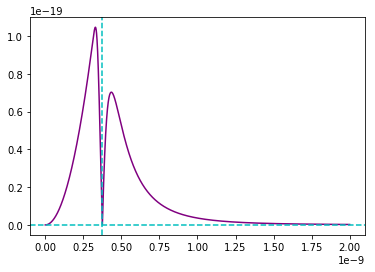

First area: 56.234894003944504 cm³/mol
Second area: 61.98258250381506 cm³/mol
Actual area: -5.747688499870556 cm³/mol
Literature value: -6.14 cm³/mol


In [9]:
# Integration

r = np.linspace(.0001e-10, 20e-10, 10000)
N2_pos = abs(N2_f(r))

plt.plot(r, N2_pos, 'purple') # Plots absolute value of the N2_f(r) curve
plt.axhline(y = 0, color = 'c', linestyle = '--')
plt.axvline(x = 3.75e-10, color = 'c', linestyle = '--') # The sigma value where the potential is 0

plt.show()

def integrand(r):
    return abs(N2_f(r))

ans, err = quad(integrand, 0, 3.75e-10) # Finds the area between 0 and 3.75 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_N2_1 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('First area:',b2_N2_1, 'cm\u00b3/mol')

ans, err = quad(integrand, 3.75e-10, 20e-10) # Finds the area between 3.75 and 20 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_N2_2 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('Second area:',b2_N2_2, 'cm\u00b3/mol')

print('Actual area:',b2_N2_1-b2_N2_2, 'cm\u00b3/mol')
print('Literature value: -6.14 cm\u00b3/mol')

### Argon

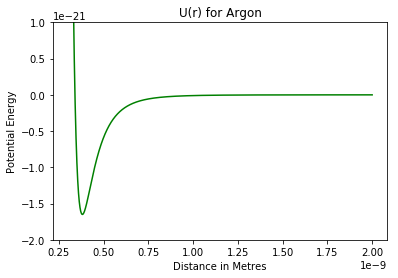

In [10]:
Ar_sigma = 3.40E-10 # Sigma value in Metres
Ar_epsilon = 1.65E-21 # Epsilon value in Joules
r = np.linspace(3e-10, 20e-10,num=10000) # Plots 10,000 values between 3 and 20 Angstroms

def Ar_U(r):
    return 4*Ar_epsilon*((Ar_sigma/r)**(12)-(Ar_sigma/r)**(6))

plt.plot(r, Ar_U(r), color = 'g')
plt.ylim(-0.2e-20,1e-21)
plt.title('U(r) for Argon')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()


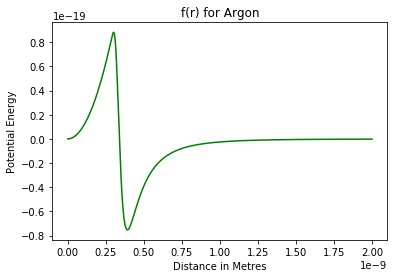

Argon max potential energy: 8.828709397090533e-20 Joules
Argon min potential energy: -7.532641157841751e-20 Joules


In [11]:
k = 1.38E-23 #Boltzmann constant
T = 293.15 # Temperature
r = np.linspace(.0001e-10, 20e-10,num=10000) # Plots 10,000 values between 1 and 20 Angstroms

def Ar_f(r):
    return (1-(np.exp((-Ar_U(r)/(k*T)))))*(r**2)
            
plt.plot(r, Ar_f(r), color = 'g')
plt.title('f(r) for Argon')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()

# Finding the values for the maximum and minimum potential energies.

def poten(r):
    return (1-(np.exp((-Ar_U(r)/(k*T)))))*(r**2)

r_min = 0.0001e-10
r_max = 20e-10

numSteps = 100000
y_min = poten(r_min)
y_max = y_min
for i in range(numSteps):
    r = r_min + (r_max - r_min) * float(i) / numSteps
    y = poten(r)
    if y < y_min: y_min = y
    if y > y_max: y_max = y
        
print('Argon max potential energy:',y_max,'Joules')
print('Argon min potential energy:',y_min,'Joules')

### Monte Carlo for Argon

In [12]:
# Area between 0 and 3.40 angstroms

def b_Ar(r):
    return (1-(np.exp((-Ar_U(r)/(k*T)))))*(r**2)

rmin = 0.0
rmax = Ar_sigma

ymin = 0.0
ymax = y_max 

rectArea = (rmax - rmin) * (ymax - ymin)
numPoints = 100000
ctr = 0
for j in range(numPoints):
    r = rmin + (rmax - rmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if b_Ar(r) > 0 and y > 0 and y <= b_Ar(r):
        ctr += 1
    if b_Ar(r) < 0 and y < 0 and y >= b_Ar(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea = ((rectArea * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the first part =', fnArea, 'cm\u00b3/mol')

# Area between 3.40 and 20 Angstroms

def b(r):
    return abs((1-(np.exp((-Ar_U(r)/(k*T)))))*(r**2))

rmin1 = Ar_sigma
rmax1 = 20e-10

ymin1 = 0.0
ymax1 = -y_min # Absolute value of the minimum potential energy

rectArea1 = (rmax1 - rmin1) * (ymax1 - ymin1)
numPoints = 100000
ctr = 0
for i in range(numPoints):
    r = rmin1 + (rmax1 - rmin1) * random.random()
    y = ymin1 + (ymax1 - ymin1) * random.random()
    if b(r) > 0 and y > 0 and y <= b(r):
        ctr += 1
    if b(r) < 0 and y < 0 and y >= b(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea1 = ((rectArea1 * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the second part =', fnArea1, 'cm\u00b3/mol')
Ar_MC = fnArea-fnArea1
print('Monte Carlo Area =',Ar_MC, 'cm\u00b3/mol') # Prints Monte Carlo area.
print('Literature value: -16.90 cm\u00b3/mol')

Area for the first part = 42.91569845588117 cm³/mol
Area for the second part = 58.54449957959964 cm³/mol
Monte Carlo Area = -15.628801123718468 cm³/mol
Literature value: -16.90 cm³/mol


### Numerical Integration for Argon

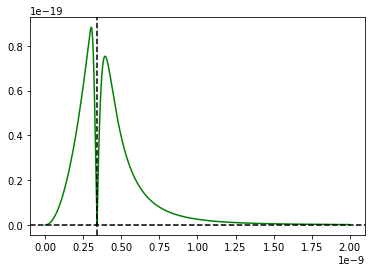

First area: 42.800713126614674 cm³/mol
Second area: 59.08800381871019
Actual area: -16.287290692095517 cm³/mol
Literature value: -16.90 cm³/mol


In [13]:
# Integration

r = np.linspace(.0001e-10, 20e-10, 10000)
Ar_pos = abs(Ar_f(r))

plt.plot(r, Ar_pos, 'g') # Plots absolute value of the Ar_f(r) curve
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.axvline(x = 3.4e-10, color = 'k', linestyle = '--') # The sigma value where the potential is 0

plt.show()

def integrand(r):
    return abs(Ar_f(r))

ans, err = quad(integrand, 0, 3.4e-10) # Finds the area between 0 and 3.40 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_Ar1 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('First area:',b2_Ar1, 'cm\u00b3/mol')

ans, err = quad(integrand, 3.4E-10, 20e-10) # Finds the area between 3.40 and 20 angstroms
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_Ar2 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('Second area:',b2_Ar2)

print('Actual area:',b2_Ar1-b2_Ar2, 'cm\u00b3/mol')
print('Literature value: -16.90 cm\u00b3/mol')

### Xenon

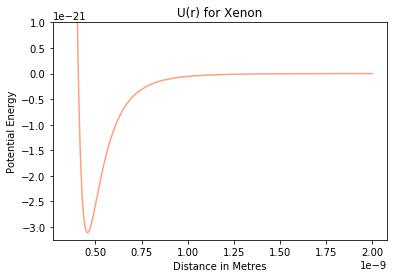

In [14]:
Xe_sigma = 4.07E-10 # Sigma value in Metres
Xe_epsilon = 3.11E-21 # Epsilon value in Joules
r = np.linspace(3.5e-10, 20e-10, 10000) # Plots 10,000 values between 3.5 and 20 Angstroms

def Xe_U(r):
    return 4*Xe_epsilon*((Xe_sigma/r)**(12)-(Xe_sigma/r)**(6))

plt.plot(r, Xe_U(r), 'lightsalmon')
plt.ylim(-3.25e-21,1e-21)
plt.title('U(r) for Xenon')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()       

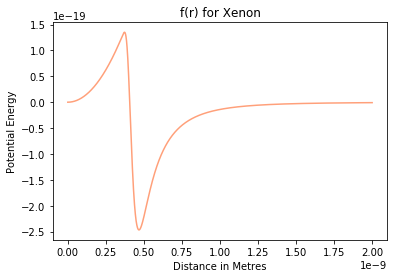

Xenon max potential energy: 1.3522061312788092e-19 Joules
Xenon min potential energy: -2.468796241795539e-19 Joules


In [15]:
k = 1.38E-23 #Boltzmann constant
T = 293.15 # Temperature
r = np.linspace(0.0001e-10, 20e-10, 10000) # Plots 10,000 values between 1 and 20 Angstroms
n= 100000
def Xe_f(r):
    return (1-(np.exp((-Xe_U(r)/(k*T)))))*(r**2)
            
plt.plot(r, Xe_f(r), color = 'lightsalmon')
plt.title('f(r) for Xenon')
plt.xlabel('Distance in Metres')
plt.ylabel('Potential Energy')
plt.show()

# Finding the values for the maximum and minimum potential energies.

def poten(r):
    return (1-(np.exp((-Xe_U(r)/(k*T)))))*(r**2)

r_min = 0.0001e-10
r_max = 20e-10

numSteps = 100000
y_min = poten(r_min)
y_max = y_min
for i in range(numSteps):
    r = r_min + (r_max - r_min) * float(i) / numSteps
    y = poten(r)
    if y < y_min: y_min = y
    if y > y_max: y_max = y
        
print('Xenon max potential energy:',y_max,'Joules')
print('Xenon min potential energy:',y_min,'Joules')

### Monto Carlo for Xenon

In [16]:
# Area between 0 and 4.07 angstroms

def b_Xe(r):
    return (1-(np.exp((-Xe_U(r)/(k*T)))))*(r**2)

rmin = 0.0
rmax = Xe_sigma

ymin = 0.0
ymax = y_max

rectArea = (rmax - rmin) * (ymax - ymin)
numPoints = 1000000
ctr = 0
for j in range(numPoints):
    r = rmin + (rmax - rmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if b_Xe(r) > 0 and y > 0 and y <= b_Xe(r):
        ctr += 1
    if b_Xe(r) < 0 and y < 0 and y >= b_Xe(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea = ((rectArea * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the first part =', fnArea, 'cm\u00b3/mol')

# Area between 4.07 and 20 Angstroms

def b(r):
    return abs((1-(np.exp((-Xe_U(r)/(k*T)))))*(r**2))

rmin1 = Xe_sigma
rmax1 = 20e-10

ymin1 = 0.0
ymax1 = -y_min # Absolute value of the minimum potential energy

rectArea1 = (rmax1 - rmin1) * (ymax1 - ymin1)
numPoints = 1000000
ctr = 0
for i in range(numPoints):
    r = rmin1 + (rmax1 - rmin1) * random.random()
    y = ymin1 + (ymax1 - ymin1) * random.random()
    if b(r) > 0 and y > 0 and y <= b(r):
        ctr += 1
    if b(r) < 0 and y < 0 and y >= b(r):
        ctr += 1

# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
fnArea1 = ((rectArea1 * float(ctr)) / numPoints) * 2 * np.pi * 6.022e23 * 1e6
print('Area for the second part =', fnArea1, 'cm\u00b3/mol')

Xe_MC = fnArea-fnArea1
print('Monte Carlo Area =',Xe_MC, 'cm\u00b3/mol') # Prints Monte Carlo area.
print('Literature Value: -131.41 cm\u00b3/mol')

Area for the first part = 77.31132358969697 cm³/mol
Area for the second part = 210.77088894053574 cm³/mol
Monte Carlo Area = -133.45956535083877 cm³/mol
Literature Value: -131.41 cm³/mol


### Numerical Integration for Xenon

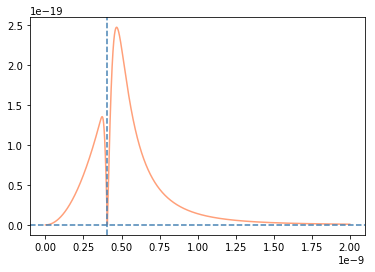

First area: 77.1483343164905 cm³/mol
Second area: 209.49408133762498 cm³/mol
Actual area: -132.34574702113446 cm³/mol
Literature Value: -131.41 cm³ mol⁻¹


In [17]:
r = np.linspace(0.0001e-10, 20e-10, 10000)
Xe_pos = abs(Xe_f(r))

plt.plot(r, Xe_pos, 'lightsalmon') 
plt.axhline(y = 0, color = 'steelblue', linestyle = '--')
plt.axvline(x = 4.07e-10, color = 'steelblue', linestyle = '--') # The sigma value where the potential is 0

plt.show()

def integrand(r):
    return abs(Xe_f(r))

ans, err = quad(integrand, 0, 4.07e-10)
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_Xe1 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('First area:',b2_Xe1, 'cm\u00b3/mol')

ans, err = quad(integrand, 4.07E-10, 20e-10)
# This converts to units of cm^3 mol^-1 from units of m^-3 and finishes the integral by multiplying by 2 Pi
b2_Xe2 = ans * (6.02214E23) * (1e6) * (2 * np.pi)
print('Second area:',b2_Xe2, 'cm\u00b3/mol')

print('Actual area:',b2_Xe1-b2_Xe2, 'cm\u00b3/mol')
print('Literature Value: -131.41 cm\u00b3 mol\u207b\u00b9')

### Accuracy of Results.<br>
For the monte carlo, I found that as I increased the number of points guesses above and below the curve, the more it matched the value that the integration gave me.<br><br>
For Helium, more often than not when I ran the code the monte carlo value was more accurate than the numerical integration. The integration gave close values for the b$_{2}$ but if the integration was not correct or near to the value of the the literature virial coefficient, then the monte carlo would be off as it is a way to integrate without actually doing the process of integration.<br><br> More accurate values of sigma and epsilon are required to get better results.

### (a) Ideal Molar Volume<br>(b) Virial Molar Volume

In [18]:
p = 600e5 # Pressure in Pa

R = 8.3145e6 # Gas constant in m^3 Pa mol^-1 K^-1

T = 600 # Temperature in K

ideal_MV = ((R*T)/p)

print("The ideal molar volume of He is",ideal_MV,"cm\u00b3 mol\u207b\u00b9")

The ideal molar volume of He is 83.145 cm³ mol⁻¹


In [19]:
n = 1 # Moles in mol
V = 1e6 # Volume in cm^3 
b = 10.57 # Virial coefficient for He in cm^3 mol^-1 at 600 K

virial_MV = ((R*T/p)) + b*(n/V)
print('The viral molar volume of He is',virial_MV,'cm\u00b3 mol\u207b\u00b9')

The viral molar volume of He is 83.14501057 cm³ mol⁻¹


### Advanced question

Through the expansion of the canonical partition function, the virial equation can be found. Using statistical thermodynamics, the position of the particles is defined which allows us to solve the properties of the system and calculate the B values. 

For the literature values, I found them from this paper: Numerical evaluation of second and third virial coefficients of some inert gases via classical cluster expansion

For the Monte Carlo and finding the values of the potential energies, this website helped me: http://code.activestate.com/recipes/577263-numerical-integration-using-monte-carlo-method/

When doing the integration for the curves I couldn't figure out how to integrate when the Y values were below 0, so I made the whole graph positive by plotting the absolute graph and then integrating in 2 parts, before and after the sigma value, as the potential was 0 at that point. I used this website when I was looking for a method on how to integrate in python. https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

### Self Assessment 

For the task I would give myself 8.5/10, because I put quite a lot of work into this and I feel that my values for the monte carlo and the integration are very accurate. The last question could have been answered better<br><br>I helped a few people when working together.<br><br>I think that if someone were to look at my code and the graphs plotted they would be able to see what I was trying to do.<br>Something to be improved would be my method of integration, as it seems a bit inefficient to plot the absolute values and then fiddle around with the numbers at the end rather than integrating the entire curve. If I were to do this again I would put more time into trying to integrate when y < 0. As well as working on loops to make the code more efficent, rather than having to copy and paste for each element and change it slightly to cater for the difference.